In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

In [35]:
from collections import Counter
import pandas as pd

Text(0, 0.5, 'Viagra')

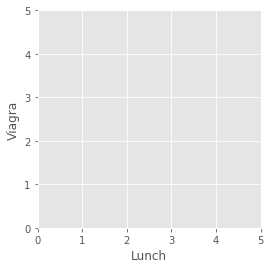

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 5)
ax.set_xlabel('Lunch')
ax.set_ylim(0, 5)
ax.set_ylabel('Viagra')


In [5]:
documents = [
    """From: Martha Washington <marthafirst@hotmail.com>
Subject: Lunch
Date: January 25, 1794 9:30:58 AM EST
To: George Washington <president@whitehouse.gov>

Looking forward to lunch at noon today. I reserved my MealPal at Nerds and Nibblers. Please don't forget to book yours. You know how much I hate standing in line.

 xoxo Martha 😻
""",
    """From: Aaron Burr <aabear@aol.com>
Subject: Quality meds, low price, quick delivery!
Date: January 25, 1794 9:35:21 AM EST
To: George Washington <president@whitehouse.gov>

Not dead yet? We have the Viagra that you need!!!

GUARANTEED BEST PRICE VIAGRA! WE HAVE QUICKSILVER TOO!!!

CLICK HERE FOR VIAGRA! ORDER NOW!
http://legit-pharmacy.ru/viagra-deals?ref=aabear

""",
    
]

In [6]:
vocab = ['lunch', 'viagra']

In [19]:
from string import punctuation

In [24]:
def replace_punctuation_with_spaces(text):
    """Return text without punctuation"""
    output = ''
    for char in text:
        if char in punctuation:
            char = ' '
        output += char
    return output

In [38]:
def tokenize(doc, vocab=vocab):
    """Return a list of words in text"""
    text = replace_punctuation_with_spaces(doc.lower())
    words = [word for word in text.split() if word in vocab]
    return words

In [40]:
corpus = [tokenize(doc) for doc in documents]
corpus

[['lunch', 'lunch'], ['viagra', 'viagra', 'viagra', 'viagra']]

In [43]:
def vectorize(corpus):
    return pd.DataFrame([Counter(doc) for doc in corpus])

In [44]:
vectorize(corpus)

,lunch,viagra
0,2.0,NaN
1,NaN,4.0


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(vocabulary=vocab)

In [47]:
cv.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=['lunch', 'viagra'])

In [49]:
cv.transform(documents).toarray()

array([[2, 0],
       [0, 4]])